<a href="https://colab.research.google.com/github/Kur1sutaru/IBI5031-Machine-Learning-apply-to-Bioinformatics/blob/main/brca_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd


In [36]:
from google.colab import files
uploaded = files.upload()

Saving brca-clinical-subtype.csv to brca-clinical-subtype.csv


In [5]:
dados_pancan = pd.read_csv('pancanbrca_data.csv')

In [37]:
dados_brca = pd.read_csv('brca-clinical-subtype.csv')

### Dados de expressão diferencial entre amostras normais e tumorais

In [38]:
dados_brca.head()

,Unnamed: 0,patient,Tumor.Type,Included_in_previous_marker_papers,vital_status,days_to_birth,days_to_death,days_to_last_followup,age_at_initial_pathologic_diagnosis,pathologic_stage,Tumor_Grade,BRCA_Pathology,BRCA_Subtype_PAM50,MSI_status,HPV_Status,tobacco_smoking_history,CNV Clusters,Mutation Clusters,DNA.Methylation Clusters,mRNA Clusters,miRNA Clusters,lncRNA Clusters,Protein Clusters,PARADIGM Clusters,Pan-Gyn Clusters
0,1,TCGA-3C-AAAU,BRCA,NO,Alive,-20211.0,NaN,4047.0,55,NaN,NaN,NaN,LumA,NaN,NaN,NaN,C6,C7,C1,C1,C3,NaN,NaN,C5,NaN
1,2,TCGA-3C-AALI,BRCA,NO,Alive,-18538.0,NaN,4005.0,50,Stage_II,NaN,NaN,Her2,NaN,NaN,NaN,C6,C9,C2,C2,C3,NaN,C2,C4,C4
2,3,TCGA-3C-AALJ,BRCA,NO,Alive,-22848.0,NaN,1474.0,62,Stage_II,NaN,NaN,LumB,NaN,NaN,NaN,C6,C4,C2,C2,C2,NaN,NaN,C4,NaN
3,4,TCGA-3C-AALK,BRCA,NO,Alive,-19074.0,NaN,1448.0,52,Stage_I,NaN,NaN,LumA,NaN,NaN,NaN,C1,C5,C2,C2,C2,NaN,C2,C6,C4
4,5,TCGA-4H-AAAK,BRCA,NO,Alive,-18371.0,NaN,348.0,50,Stage_III,NaN,NaN,LumA,NaN,NaN,NaN,C6,C4,C1,C2,C2,NaN,C2,C6,C1


In [8]:
dados_brca.shape

(1087, 25)

### Dados clínicos e subtipos moleculares

In [6]:
dados_pancan.head()

,Patient ID,Sample ID,cancer_tpe_detailed,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Overall Survival Status,Sex,Ethnicity,Race,Subtype,Tumor_Type,10p Status,10q Status,11p Status,11q Status,12p Status
0,TCGA-3C-AAAU,TCGA-3C-AAAU-01,Breast Invasive Lobular Carcinoma,24.0,0.7787,55,0.3319,0.55,0:LIVING,Female,Not Hispanic Or Latino,White,BRCA_LumA,Infiltrating Lobular Carcinoma,Lost,Lost,Not Called,Lost,Not Called
1,TCGA-3C-AALI,TCGA-3C-AALI-01,Breast Invasive Ductal Carcinoma,458.0,0.7164,50,0.3449,0.74,0:LIVING,Female,Not Hispanic Or Latino,Black or African American,BRCA_Her2,Infiltrating Ductal Carcinoma,Lost,Lost,Not Called,NaN,Not Called
2,TCGA-3C-AALJ,TCGA-3C-AALJ-01,Breast Invasive Ductal Carcinoma,28.0,0.5340,62,0.3266,0.31,0:LIVING,Female,Not Hispanic Or Latino,Black or African American,BRCA_LumB,Infiltrating Ductal Carcinoma,Not Called,NaN,Not Called,NaN,Not Called
3,TCGA-3C-AALK,TCGA-3C-AALK-01,Breast Invasive Ductal Carcinoma,45.0,0.0764,52,0.3218,0.03,0:LIVING,Female,Not Hispanic Or Latino,Black or African American,BRCA_LumA,Infiltrating Ductal Carcinoma,Not Called,Not Called,Not Called,Not Called,Not Called
4,TCGA-4H-AAAK,TCGA-4H-AAAK-01,Breast Invasive Lobular Carcinoma,21.0,0.2364,50,0.3411,0.01,0:LIVING,Female,Not Hispanic Or Latino,White,BRCA_LumA,Infiltrating Lobular Carcinoma,Not Called,Not Called,Not Called,NaN,NaN


In [7]:
dados_pancan.shape

(1084, 19)

### Explorar os dados clínicos

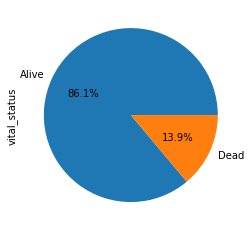

In [11]:
dados_brca['vital_status'].value_counts().plot.pie(autopct="%.1f%%")

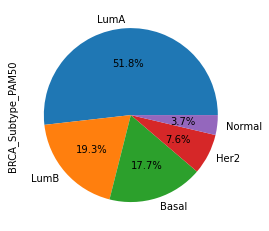

In [12]:
dados_brca['BRCA_Subtype_PAM50'].value_counts().plot.pie(autopct="%.1f%%")

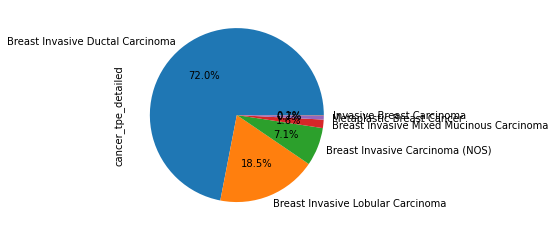

In [8]:
dados_pancan['cancer_tpe_detailed'].value_counts().plot.pie(autopct="%.1f%%")

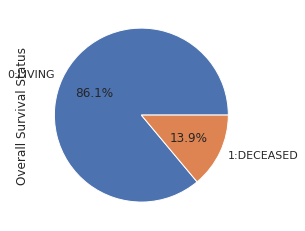

In [24]:
dados_pancan['Overall Survival Status'].value_counts().plot.pie(autopct="%.1f%%")

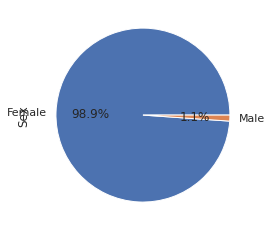

In [26]:
dados_pancan['Sex'].value_counts().plot.pie(autopct="%.1f%%")

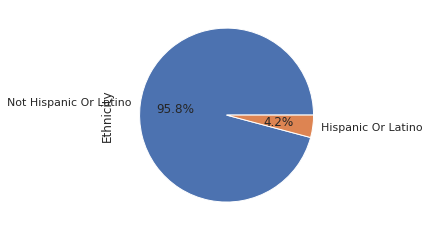

In [27]:
dados_pancan['Ethnicity'].value_counts().plot.pie(autopct="%.1f%%")

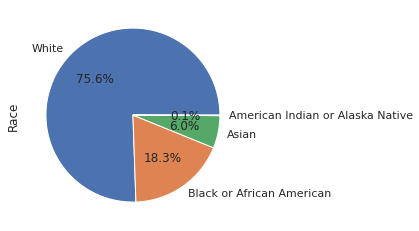

In [28]:
dados_pancan['Race'].value_counts().plot.pie(autopct="%.1f%%")

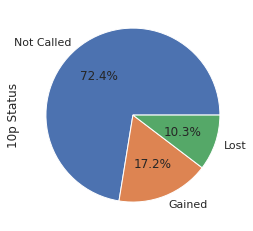

In [39]:
dados_pancan['10p Status'].value_counts().plot.pie(autopct="%.1f%%")

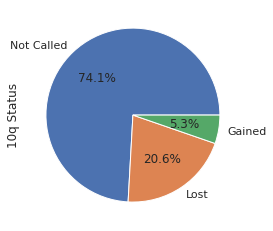

In [40]:
dados_pancan['10q Status'].value_counts().plot.pie(autopct="%.1f%%")

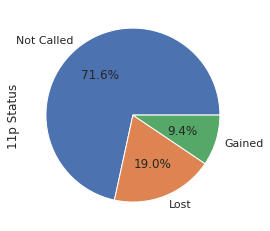

In [41]:
dados_pancan['11p Status'].value_counts().plot.pie(autopct="%.1f%%")

In [42]:
cod_afetada= dados_brca['BRCA_Subtype_PAM50'].value_counts().index[0:10]

In [43]:
cod_afetada

Index(['LumA', 'LumB', 'Basal', 'Her2', 'Normal'], dtype='object')

In [45]:
dados_brca.query('BRCA_Subtype_PAM50 in @cod_afetada')

,Unnamed: 0,patient,Tumor.Type,Included_in_previous_marker_papers,vital_status,days_to_birth,days_to_death,days_to_last_followup,age_at_initial_pathologic_diagnosis,pathologic_stage,Tumor_Grade,BRCA_Pathology,BRCA_Subtype_PAM50,MSI_status,HPV_Status,tobacco_smoking_history,CNV Clusters,Mutation Clusters,DNA.Methylation Clusters,mRNA Clusters,miRNA Clusters,lncRNA Clusters,Protein Clusters,PARADIGM Clusters,Pan-Gyn Clusters
0,1,TCGA-3C-AAAU,BRCA,NO,Alive,-20211.0,NaN,4047.0,55,NaN,NaN,NaN,LumA,NaN,NaN,NaN,C6,C7,C1,C1,C3,NaN,NaN,C5,NaN
1,2,TCGA-3C-AALI,BRCA,NO,Alive,-18538.0,NaN,4005.0,50,Stage_II,NaN,NaN,Her2,NaN,NaN,NaN,C6,C9,C2,C2,C3,NaN,C2,C4,C4
2,3,TCGA-3C-AALJ,BRCA,NO,Alive,-22848.0,NaN,1474.0,62,Stage_II,NaN,NaN,LumB,NaN,NaN,NaN,C6,C4,C2,C2,C2,NaN,NaN,C4,NaN
3,4,TCGA-3C-AALK,BRCA,NO,Alive,-19074.0,NaN,1448.0,52,Stage_I,NaN,NaN,LumA,NaN,NaN,NaN,C1,C5,C2,C2,C2,NaN,C2,C6,C4
4,5,TCGA-4H-AAAK,BRCA,NO,Alive,-18371.0,NaN,348.0,50,Stage_III,NaN,NaN,LumA,NaN,NaN,NaN,C6,C4,C1,C2,C2,NaN,C2,C6,C1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,1083,TCGA-WT-AB44,BRCA,NO,Alive,NaN,NaN,883.0,77,Stage_I,NaN,NaN,LumA,NaN,NaN,NaN,C1,C7,C1,C2,C2,NaN,NaN,C8,NaN
1083,1084,TCGA-XX-A899,BRCA,NO,Alive,-17022.0,NaN,467.0,46,Stage_III,NaN,NaN,LumA,NaN,NaN,NaN,C6,C2,C1,C2,C2,NaN,C2,C6,C3
1084,1085,TCGA-XX-A89A,BRCA,NO,Alive,-25000.0,NaN,488.0,68,Stage_II,NaN,NaN,LumA,NaN,NaN,NaN,C3,C9,C1,C2,C2,NaN,NaN,C6,NaN
1085,1086,TCGA-Z7-A8R5,BRCA,NO,Alive,-22280.0,NaN,3287.0,61,Stage_III,NaN,NaN,LumA,NaN,NaN,NaN,C6,C8,C1,C2,C2,NaN,C2,C8,C1


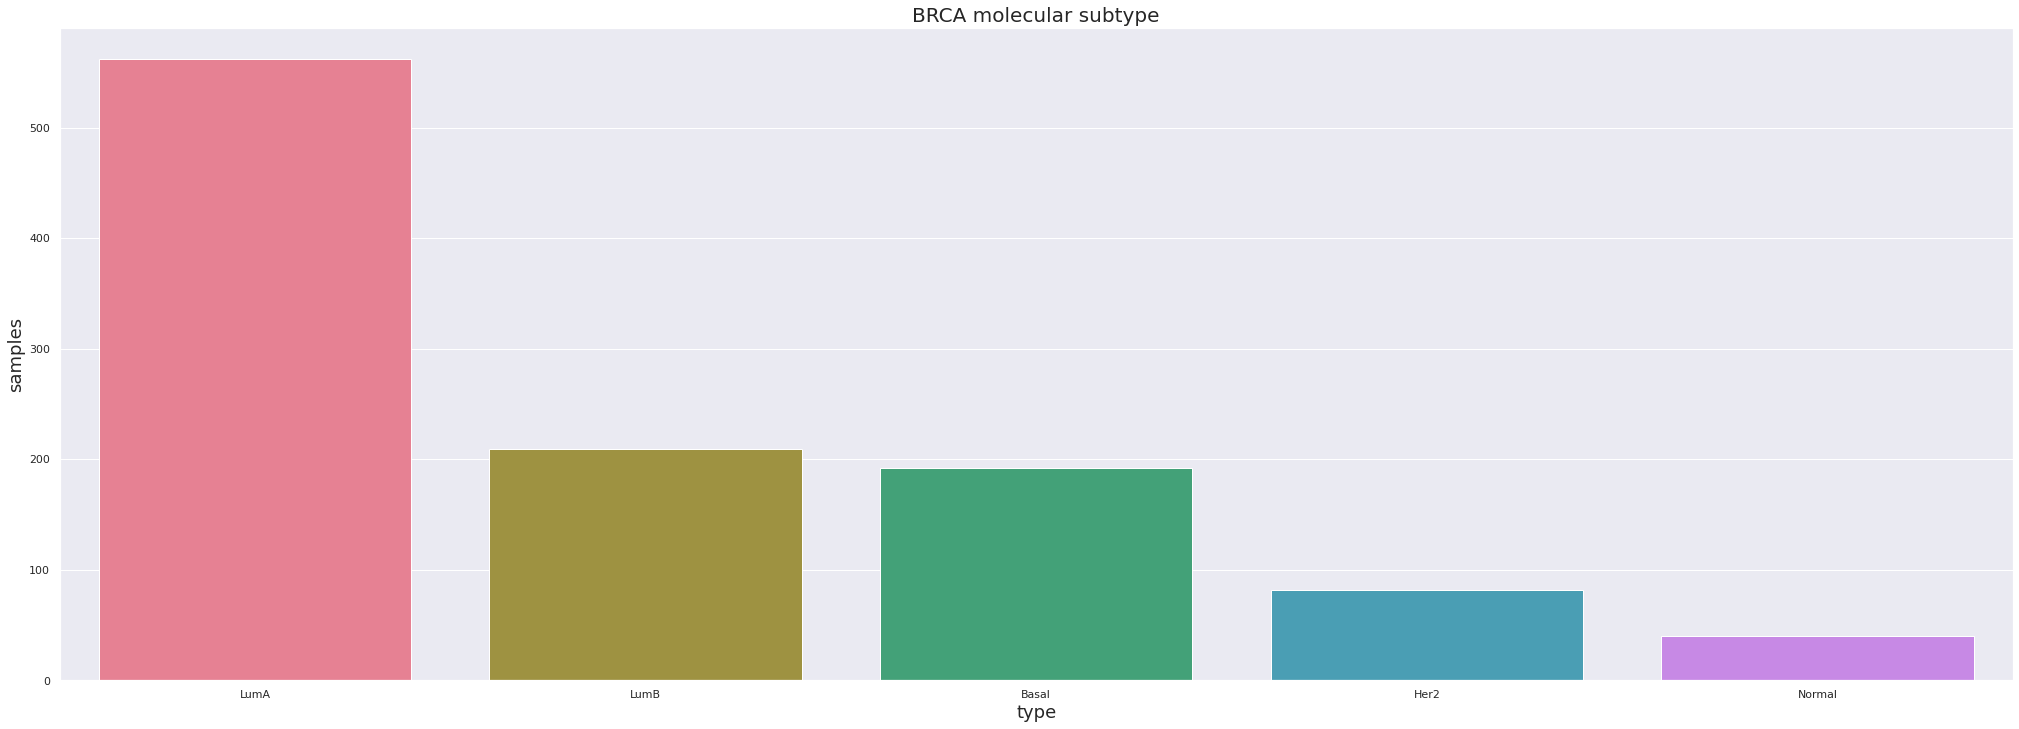

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(35, 12))
ax = sns.countplot(x = 'BRCA_Subtype_PAM50', data=dados_brca.query('BRCA_Subtype_PAM50 in @cod_afetada'), order= dados_brca['BRCA_Subtype_PAM50'].value_counts().index[0:10], palette='husl')
ax.set_title('BRCA molecular subtype')
plt.title("BRCA molecular subtype", fontsize = 20)
plt.xlabel("type", fontsize = 18)
plt.ylabel("samples", fontsize = 18)
plt.show()

In [34]:
cod_pancan = dados_pancan['BRCA_Subtype_PAM50'].value_counts().index[0:10]

KeyError: ignored

In [31]:
cod_pancan

Index(['Infiltrating Ductal Carcinoma', 'Infiltrating Lobular Carcinoma',
       'Other', 'Mixed Histology (NOS)', 'Mucinous Carcinoma',
       'Metaplastic Carcinoma', 'Medullary Carcinoma',
       'Breast Invasive Carcinoma', 'Infiltrating Carcinoma (NOS)'],
      dtype='object')

In [32]:
dados_pancan.query('Tumor_Type in @cod_pancan')

,Patient ID,Sample ID,cancer_tpe_detailed,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Overall Survival Status,Sex,Ethnicity,Race,Subtype,Tumor_Type,10p Status,10q Status,11p Status,11q Status,12p Status
0,TCGA-3C-AAAU,TCGA-3C-AAAU-01,Breast Invasive Lobular Carcinoma,24.0,0.7787,55,0.3319,0.55,0:LIVING,Female,Not Hispanic Or Latino,White,BRCA_LumA,Infiltrating Lobular Carcinoma,Lost,Lost,Not Called,Lost,Not Called
1,TCGA-3C-AALI,TCGA-3C-AALI-01,Breast Invasive Ductal Carcinoma,458.0,0.7164,50,0.3449,0.74,0:LIVING,Female,Not Hispanic Or Latino,Black or African American,BRCA_Her2,Infiltrating Ductal Carcinoma,Lost,Lost,Not Called,NaN,Not Called
2,TCGA-3C-AALJ,TCGA-3C-AALJ-01,Breast Invasive Ductal Carcinoma,28.0,0.5340,62,0.3266,0.31,0:LIVING,Female,Not Hispanic Or Latino,Black or African American,BRCA_LumB,Infiltrating Ductal Carcinoma,Not Called,NaN,Not Called,NaN,Not Called
3,TCGA-3C-AALK,TCGA-3C-AALK-01,Breast Invasive Ductal Carcinoma,45.0,0.0764,52,0.3218,0.03,0:LIVING,Female,Not Hispanic Or Latino,Black or African American,BRCA_LumA,Infiltrating Ductal Carcinoma,Not Called,Not Called,Not Called,Not Called,Not Called
4,TCGA-4H-AAAK,TCGA-4H-AAAK-01,Breast Invasive Lobular Carcinoma,21.0,0.2364,50,0.3411,0.01,0:LIVING,Female,Not Hispanic Or Latino,White,BRCA_LumA,Infiltrating Lobular Carcinoma,Not Called,Not Called,Not Called,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,TCGA-WT-AB44,TCGA-WT-AB44-01,Breast Invasive Lobular Carcinoma,31.0,0.3436,77,0.3186,0.24,0:LIVING,Female,Not Hispanic Or Latino,White,BRCA_LumA,Infiltrating Lobular Carcinoma,Not Called,Not Called,Not Called,Not Called,Not Called
1080,TCGA-XX-A899,TCGA-XX-A899-01,Breast Invasive Lobular Carcinoma,37.0,0.0625,46,0.3100,0.00,0:LIVING,Female,Not Hispanic Or Latino,White,BRCA_LumA,Infiltrating Lobular Carcinoma,Not Called,Not Called,Not Called,NaN,Not Called
1081,TCGA-XX-A89A,TCGA-XX-A89A-01,Breast Invasive Lobular Carcinoma,151.0,0.1764,68,0.3036,0.01,0:LIVING,Female,Not Hispanic Or Latino,White,BRCA_LumA,Infiltrating Lobular Carcinoma,Gained,Gained,Gained,Lost,Gained
1082,TCGA-Z7-A8R5,TCGA-Z7-A8R5-01,Breast Invasive Lobular Carcinoma,23.0,0.0452,61,0.3056,0.00,0:LIVING,Female,Not Hispanic Or Latino,White,BRCA_LumA,Infiltrating Lobular Carcinoma,Not Called,Not Called,Lost,Lost,Gained


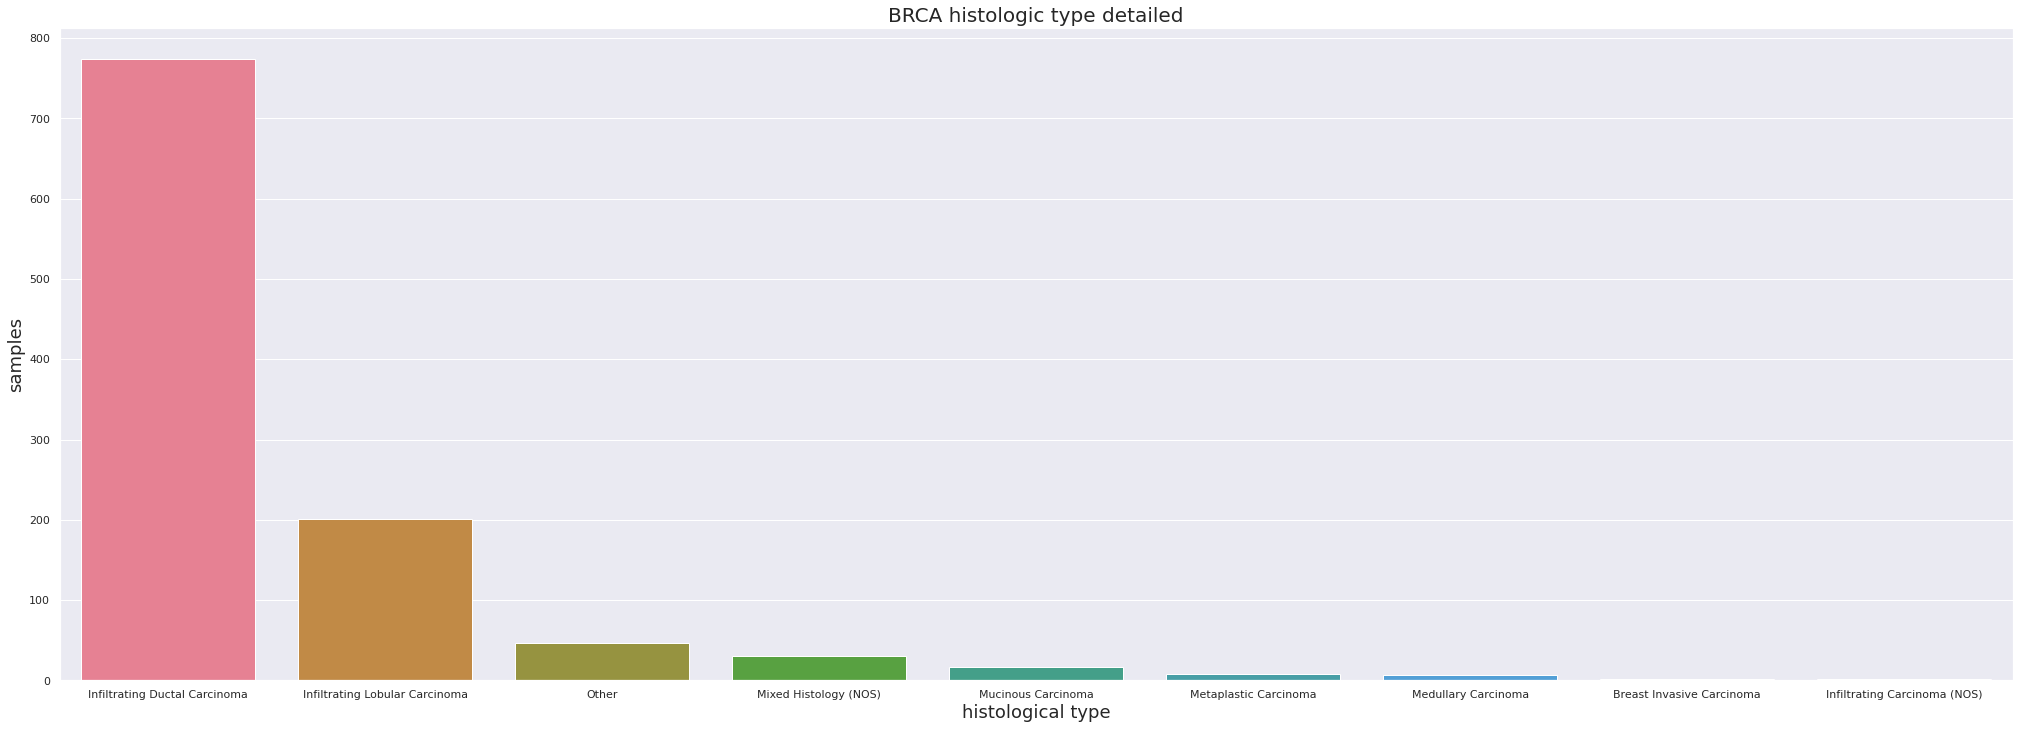

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(35, 12))
ax = sns.countplot(x = 'Tumor_Type', data=dados_pancan.query('Tumor_Type in @cod_pancan'), order= dados_pancan['Tumor_Type'].value_counts().index[0:10], palette='husl')
ax.set_title('BRCA histologic type detailed')
plt.title("BRCA histologic type detailed", fontsize = 20)
plt.xlabel("histological type", fontsize = 18)
plt.ylabel("samples", fontsize = 18)
plt.show()

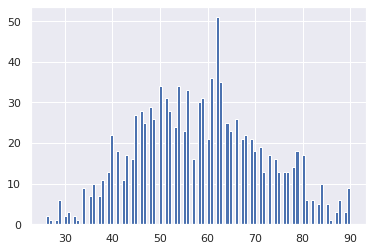

In [48]:
dados_pancan['Diagnosis Age'].hist(bins = 100)

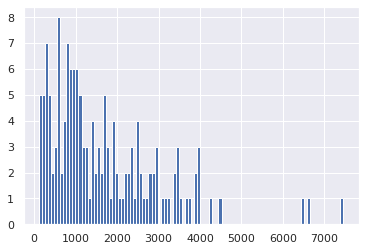

In [52]:
dados_brca['days_to_death'].hist(bins = 100)

In [13]:
dados_brca.describe()

,Unnamed: 0,days_to_birth,days_to_death,days_to_last_followup,age_at_initial_pathologic_diagnosis,Tumor_Grade,MSI_status,HPV_Status,tobacco_smoking_history
count,1087.000000,1072.000000,150.00000,983.000000,1087.000000,0.0,0.0,0.0,0.0
mean,544.000000,-21559.694963,1653.22000,1182.763988,58.388224,NaN,NaN,NaN,NaN
std,313.934176,4819.308365,1315.91844,1177.431111,13.229041,NaN,NaN,NaN,NaN
min,1.000000,-32873.000000,116.00000,-31.000000,26.000000,NaN,NaN,NaN,NaN
25%,272.500000,-24843.250000,729.50000,434.500000,49.000000,NaN,NaN,NaN,NaN
50%,544.000000,-21544.500000,1273.50000,760.000000,58.000000,NaN,NaN,NaN,NaN
75%,815.500000,-18011.000000,2370.00000,1562.000000,67.000000,NaN,NaN,NaN,NaN
max,1087.000000,-9706.000000,7455.00000,8605.000000,90.000000,NaN,NaN,NaN,NaN


In [14]:
corr = dados_brca.loc[:,'patient':'Pan-Gyn Clusters'].corr()

In [15]:
corr.head()

,days_to_birth,days_to_death,days_to_last_followup,age_at_initial_pathologic_diagnosis,Tumor_Grade,MSI_status,HPV_Status,tobacco_smoking_history
days_to_birth,1.000000,0.168398,0.188337,-0.999759,NaN,NaN,NaN,NaN
days_to_death,0.168398,1.000000,0.983072,-0.167495,NaN,NaN,NaN,NaN
days_to_last_followup,0.188337,0.983072,1.000000,-0.180690,NaN,NaN,NaN,NaN
age_at_initial_pathologic_diagnosis,-0.999759,-0.167495,-0.180690,1.000000,NaN,NaN,NaN,NaN
Tumor_Grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


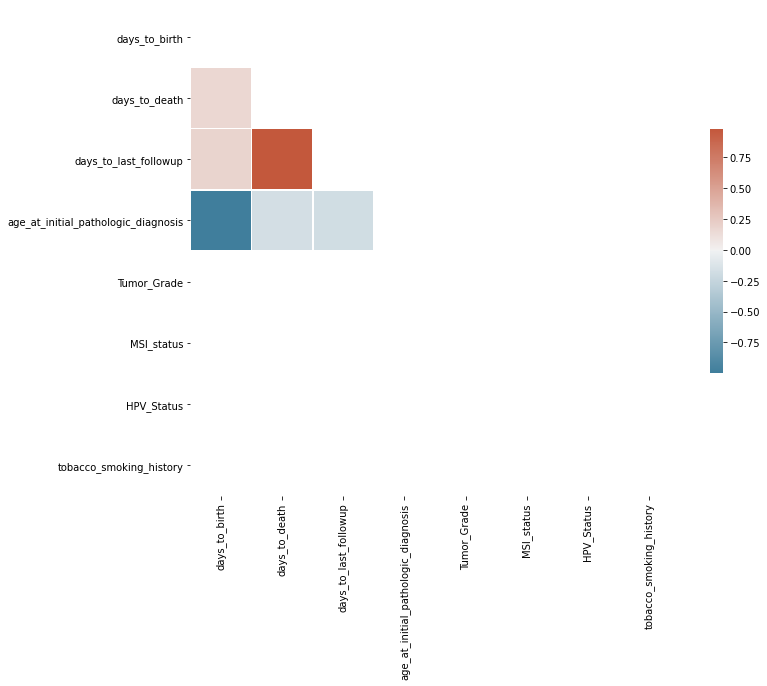

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
dados_pancan.describe()

,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score
count,1009.000000,1068.000000,1084.000000,1034.000000,1075.000000
mean,83.533201,0.295378,58.420664,0.303220,0.519991
std,283.025388,0.206738,13.219721,0.044837,1.762630
min,1.000000,0.000000,26.000000,0.217000,0.000000
25%,26.000000,0.126050,49.000000,0.277600,0.030000
50%,39.000000,0.251150,58.000000,0.297100,0.190000
75%,69.000000,0.436350,67.000000,0.321900,0.535000
max,5392.000000,0.997100,90.000000,0.828300,32.920000


In [35]:
corr = dados_pancan.loc[:,'Cancer Type Detailed':'12p Status'].corr()

In [36]:
corr.head()

,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score
Mutation Count,1.000000,0.011245,0.072447,0.196616,0.248696
Fraction Genome Altered,0.011245,1.000000,0.011558,0.058065,0.148774
Diagnosis Age,0.072447,0.011558,1.000000,0.042685,0.079851
MSI MANTIS Score,0.196616,0.058065,0.042685,1.000000,0.724051
MSIsensor Score,0.248696,0.148774,0.079851,0.724051,1.000000


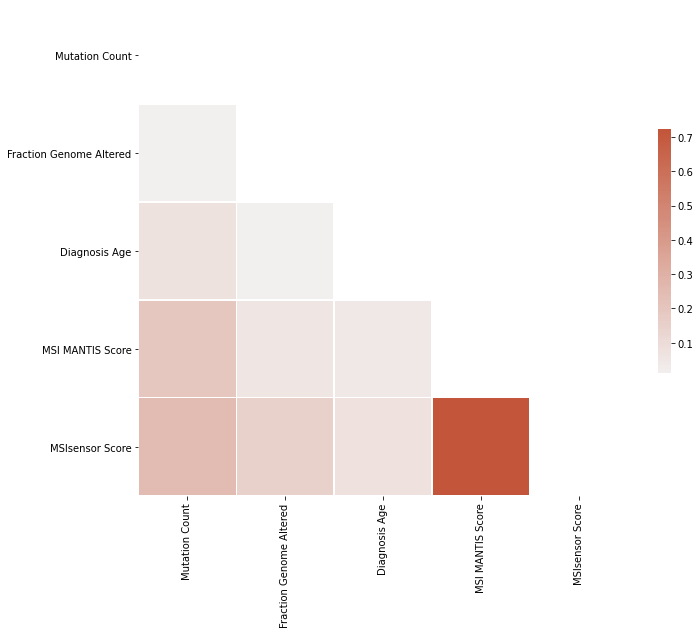

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})